<div style="float: right; width: 70%; height: 200px;">
  <div style="position: relative; top: 20%;padding-right:20%;">
  <div style="font-size:280%;font-weight: bold;padding-top: 20px;"> MARS</div>
  <div style="font-size:150%;font-weight: bold;padding-top: 20px;color: rgba(0 , 0 , 0 , 0.5);"> Plot Mars 1D Model</div>
  </div>
</div>


In [1]:
import os

import numpy as np
import obspy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['lines.linewidth'] = 0.5

In [2]:
## Path
pathDirExamples = os.path.join("/Users/zhangzhiyu/MyProjects/Seisflows/specfem3d_globe/EXAMPLES/")
pathDirMars1D = os.path.join(pathDirExamples, 'mars_regional')
pathDirOutput = os.path.join(pathDirMars1D, 'OUTPUT_FILES')
pathDirData = os.path.join(pathDirMars1D, 'DATA')
pathDirDataMars = os.path.join(pathDirData, 'mars')

os.chdir(pathDirOutput)

## Read Mars_1D Model 

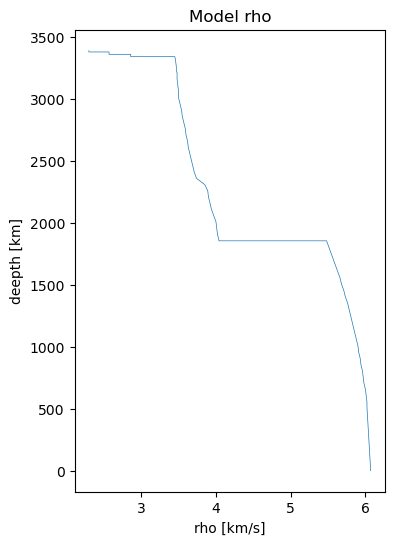

In [37]:
## Read Mars_1D Model 
def plot_model(pathDirDataMars, fileMarsModel, model='vp'):
    """
    Plot Model
    
    :param pathDirDataMars: the file Directory
    :type pathDirDataMars: str
    :param fileMarsModel: the file name
    :type fileMarsModel: str
    :param model: The name of the drawing model
    :type model: str  'vp', 'vs' or 'rho'
    
    Usage: 
    
    >>> fileMarsModel = 'mars_1D.dat'
    >>> plot_model(pathDirDataMars, fileMarsModel, model='rho')   
    
    <<< a plot figure
    """
    
    dataMarsModel = np.loadtxt(os.path.join(pathDirDataMars, fileMarsModel))
    fig = plt.figure(figsize=(4, 6))
    if (model == 'rho'):
        plt.plot(dataMarsModel[:, 3], dataMarsModel[:, 0])
    elif (model == 'vp'):
        plt.plot(dataMarsModel[:, 1], dataMarsModel[:, 0])
    elif (model == 'vs'):
        plt.plot(dataMarsModel[:, 2], dataMarsModel[:, 0])
    plt.xlabel(model + " [km/s]")
    plt.ylabel('deepth [km]')
    plt.title('Model ' + model)
    
    
fileMarsModel = 'mars_1D.dat'
plot_model(pathDirDataMars, fileMarsModel, model='rho')

## Read .xyz File

In [ ]:
## Read .xyz File
fileXYZ = "gmt_movie_000500.Z.xyz"
pathFileXYZ = os.path.join(pathDirOutput, fileXYZ)

dataXYZ = np.loadtxt(pathFileXYZ)

plt.figure()
plt.tricontourf(dataXYZ[:, 0], dataXYZ[:, 1], dataXYZ[:, 2], cmap=cm.coolwarm)

## Read Station Data

In [112]:
def read_three_channel_to_stream(fileE, fileN, fileZ, delta=0.13):
    """
    Change the trace E, N, Z to stream type
    
    :param fileE: path to station E channel
    :type fileE: str
    :param delta: time dt 
    :type delta: float
    
    Usage:
    
    >>> station = read_three_channel_to_stream(pathFileE, pathFileN, pathFileZ)
    >>> station
    
    <<< 3 Trace(s) in Stream:
... | 2023-03-01T07:41:51.225483Z - 2023-03-01T09:45:10.225483Z | 1.0 Hz, 7400 samples
... | 2023-03-01T07:41:51.226459Z - 2023-03-01T09:45:10.226459Z | 1.0 Hz, 7400 samples
... | 2023-03-01T07:41:51.227430Z - 2023-03-01T09:45:10.227430Z | 1.0 Hz, 7400 samples
    
    """
    traceE = obspy.core.stream.Trace()
    traceN = obspy.core.stream.Trace()
    traceZ = obspy.core.stream.Trace()
    station = obspy.core.stream.Stream(traces=[traceE, traceN, traceZ])

    read_trace_stats(traceE, fileE, delta)
    read_trace_stats(traceN, fileN, delta)
    read_trace_stats(traceZ, fileZ, delta)
    
    return station

def read_trace_stats(traceName, fileName, delta):
    """
    Read the stats of the trace
    
    :param traceName: trace E, N, Z name
    :type traceName: str
    :param fileName: path to station E, N, Z channel
    :type fileName: str
    :param delta: time dt 
    :type delta: float
    """
    traceName.data = np.loadtxt(fileName)[:, 1]
    traceName.stats.starttime = obspy.core.UTCDateTime()
    traceName.delta = delta

In [ ]:
## Read Station Data
fileE = 'XB.ELYSE.MXE.sem.ascii'
fileN = 'XB.ELYSE.MXN.sem.ascii'
fileZ = 'XB.ELYSE.MXZ.sem.ascii'

pathFileE = os.path.join(pathDirOutput, fileE)
pathFileN = os.path.join(pathDirOutput, fileN)
pathFileZ = os.path.join(pathDirOutput, fileZ)

station = read_three_channel_to_stream(pathFileE, pathFileN, pathFileZ)
traceE = station[0]
traceN = station[1]
traceZ = station[2]

In [6]:
print(traceE)
print('\n', traceE.stats)
print('\n', traceE.data)

... | 2023-03-01T01:50:05.066685Z - 2023-03-01T02:18:24.066685Z | 1.0 Hz, 1700 samples

          network: 
         station: 
        location: 
         channel: 
       starttime: 2023-03-01T01:50:05.066685Z
         endtime: 2023-03-01T02:18:24.066685Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 1700
           calib: 1.0

 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.07955519e-05
 -5.07780642e-05 -5.07584191e-05]


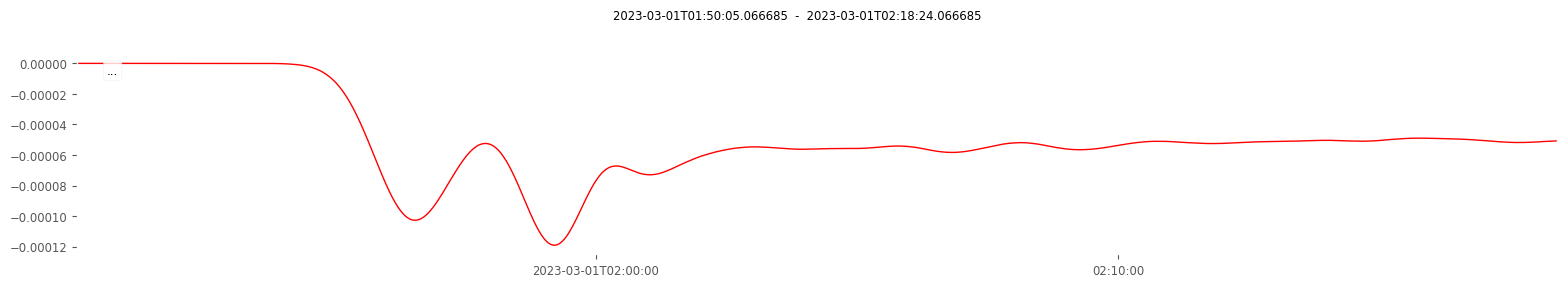

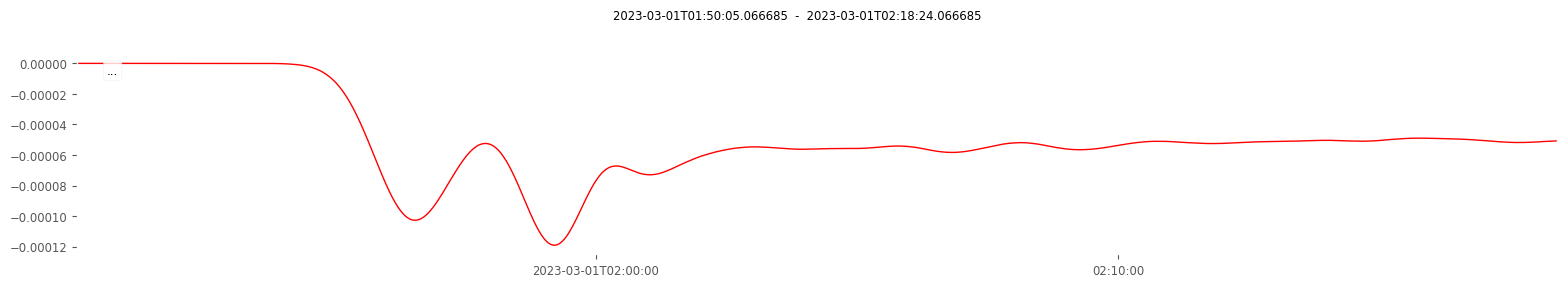

In [7]:
traceE.plot(color='red',
                size=(1600, 300),
                starttime=station[0].stats.starttime,
                endtime=station[0].stats.endtime)

Text(0.5, 1.0, 'Seismograms')

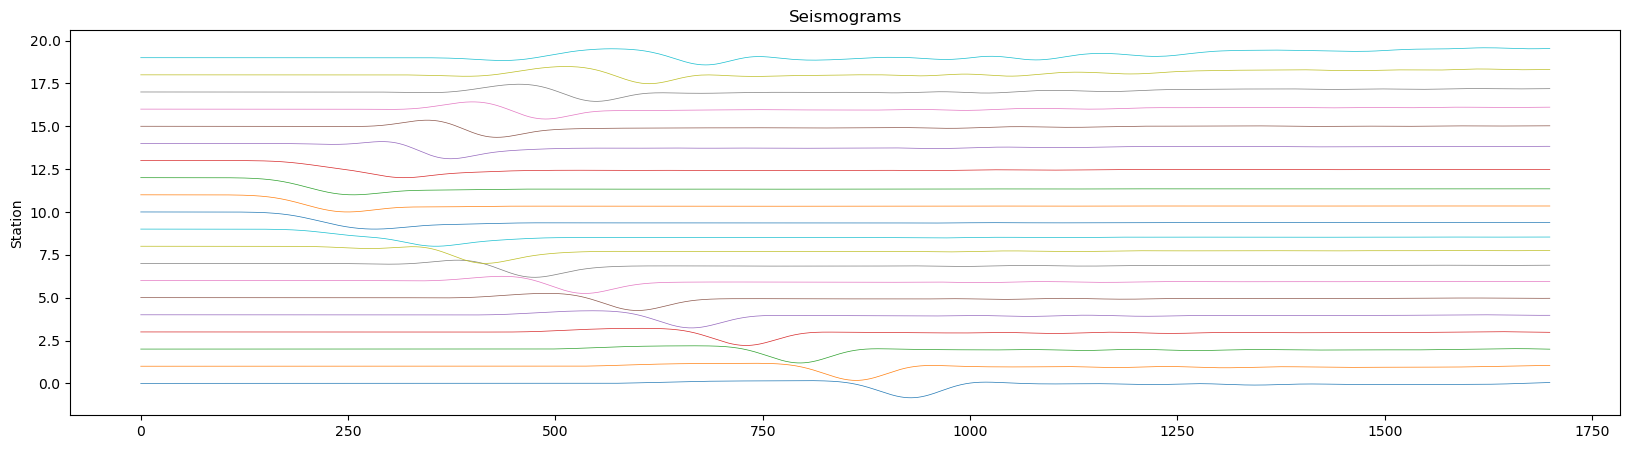

In [114]:
stations = []
traceEs = []
traceNs = []
traceZs = []
traceEsdata = []
traceNsdata = []
traceZsdata = []
N = 20
for i in range(N):
    number = str(i).zfill(5)
    fileE = 'XB.ELYSE' + number + '.MXE.sem.ascii'
    fileN = 'XB.ELYSE' + number + '.MXN.sem.ascii'
    fileZ = 'XB.ELYSE' + number + '.MXZ.sem.ascii'

    pathFileE = os.path.join(pathDirOutput, fileE)
    pathFileN = os.path.join(pathDirOutput, fileN)
    pathFileZ = os.path.join(pathDirOutput, fileZ)

    station = read_three_channel_to_stream(pathFileE, pathFileN, pathFileZ)
    traceE = station[0]
    traceN = station[1]
    traceZ = station[2]
    
    stations.append(station)
    traceEs.append(traceE)
    traceNs.append(traceN)
    traceZs.append(traceZ)
    traceEsdata.append(traceE.data)
    traceNsdata.append(traceN.data)
    traceZsdata.append(traceZ.data)

#for i in range(N):
#    _range = traceEsdata[i].max() - traceEsdata[i].min()
#    plt.plot(traceEsdata[i] / _range + i)
    
i = 0
for traceEsdat in traceEsdata:
    _range = traceEsdat.max() - traceEsdat.min()
    plt.plot(traceEsdat / _range + i)
    i = i + 1
    
#plt.xlabel('Time [s]')
plt.ylabel('Station')
plt.title('Seismograms')


Text(0.5, 1.0, 'Seismograms')

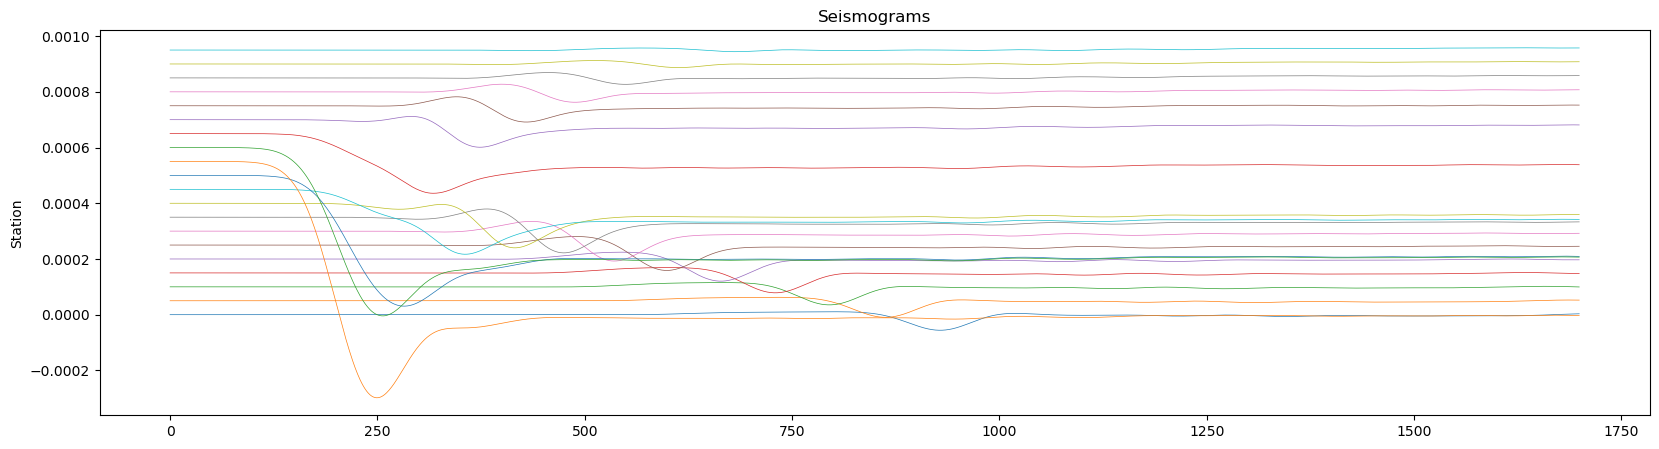

In [111]:
i = 0
for traceEsdat in traceEsdata:
    _range = traceEsdat.max() - traceEsdat.min()
    plt.plot(traceEsdat + 0.00005*i)
    i = i + 1
    
#plt.xlabel('Time [s]')
plt.ylabel('Station')
plt.title('Seismograms')

## Plot mars 1D taup

In [40]:
## conver_mars_1D_from_data_to_np
## 自己写的不好，不如用最后它的脚本

os.chdir(pathDirDataMars)
# fileMarsModel = 'mars_1D.dat'
# dataMarsModel = np.loadtxt(os.path.join(pathDirDataMars, fileMarsModel))
# dataMarsModel[:, 0] = dataMarsModel[0, 0] - dataMarsModel[:, 0]
#
# np.savetxt('mars.nd', dataMarsModel[:, :4], fmt='%1.2f') 

os.system('python convert_mars_1D_to_taup_format.py')

reading file  ./mars_1D.dat

  skipping upper  crust interface at  2
  skipping middle crust interface at  6
  found moho at   8 - radius 3341.5   depth 48.0
  found cmb  at  41 - radius 1855.38   depth 1534.12
  found icb  at  69 - radius 515.0   depth 2874.5

model data: 
  radius surface:  3389.5
  interface index: moho =  8
                   cmb  =  41
                   icb  =  69

converted to:  ./mars_1D.nd



0

In [41]:
from obspy.taup import TauPyModel
from obspy.taup import taup_create

os.chdir(pathDirDataMars)
print("creating model mars_1D")

# creates taup model for mars file
taup_create.build_taup_model('./mars_1D.nd',output_folder='./',verbose=True)

creating model mars_1D
Building obspy.taup model for './mars_1D.nd' ...


In [42]:
# read in model
flattening = 0.0  # 1.0/901.0

model = TauPyModel(model="./mars_1D.npz",verbose=True,planet_flattening=flattening)

# check
model.model.validate()

radius_km = model.model.radius_of_planet
print("model radius:",radius_km,"(km)")

model radius: 3389.5 (km)


In [99]:
N = 20

lat = 0.3
lon = 134.00000

stations = []

for i in range(N):
    ELYSE = { 'name': 'ELYSE'+str(i).zfill(5), 'lat': lat + i*0.5, 'lon': lon  } 
    stations.append(ELYSE)

In [100]:
stations

[{'name': 'ELYSE00000', 'lat': 0.3, 'lon': 134.0},
 {'name': 'ELYSE00001', 'lat': 0.8, 'lon': 134.0},
 {'name': 'ELYSE00002', 'lat': 1.3, 'lon': 134.0},
 {'name': 'ELYSE00003', 'lat': 1.8, 'lon': 134.0},
 {'name': 'ELYSE00004', 'lat': 2.3, 'lon': 134.0},
 {'name': 'ELYSE00005', 'lat': 2.8, 'lon': 134.0},
 {'name': 'ELYSE00006', 'lat': 3.3, 'lon': 134.0},
 {'name': 'ELYSE00007', 'lat': 3.8, 'lon': 134.0},
 {'name': 'ELYSE00008', 'lat': 4.3, 'lon': 134.0},
 {'name': 'ELYSE00009', 'lat': 4.8, 'lon': 134.0},
 {'name': 'ELYSE00010', 'lat': 5.3, 'lon': 134.0},
 {'name': 'ELYSE00011', 'lat': 5.8, 'lon': 134.0},
 {'name': 'ELYSE00012', 'lat': 6.3, 'lon': 134.0},
 {'name': 'ELYSE00013', 'lat': 6.8, 'lon': 134.0},
 {'name': 'ELYSE00014', 'lat': 7.3, 'lon': 134.0},
 {'name': 'ELYSE00015', 'lat': 7.8, 'lon': 134.0},
 {'name': 'ELYSE00016', 'lat': 8.3, 'lon': 134.0},
 {'name': 'ELYSE00017', 'lat': 8.8, 'lon': 134.0},
 {'name': 'ELYSE00018', 'lat': 9.3, 'lon': 134.0},
 {'name': 'ELYSE00019', 'lat': 

event:
  lat/lon = 6.0 / 133.0
  depth   =  12.0 (km)

station ELYSE00000: 
  lat/lon = 0.3 / 134.0
  epicentral distance =  5.786721915109878 (degree)

  P:  P phase arrival at 56.104 seconds
  S:  S phase arrival at 97.475 seconds



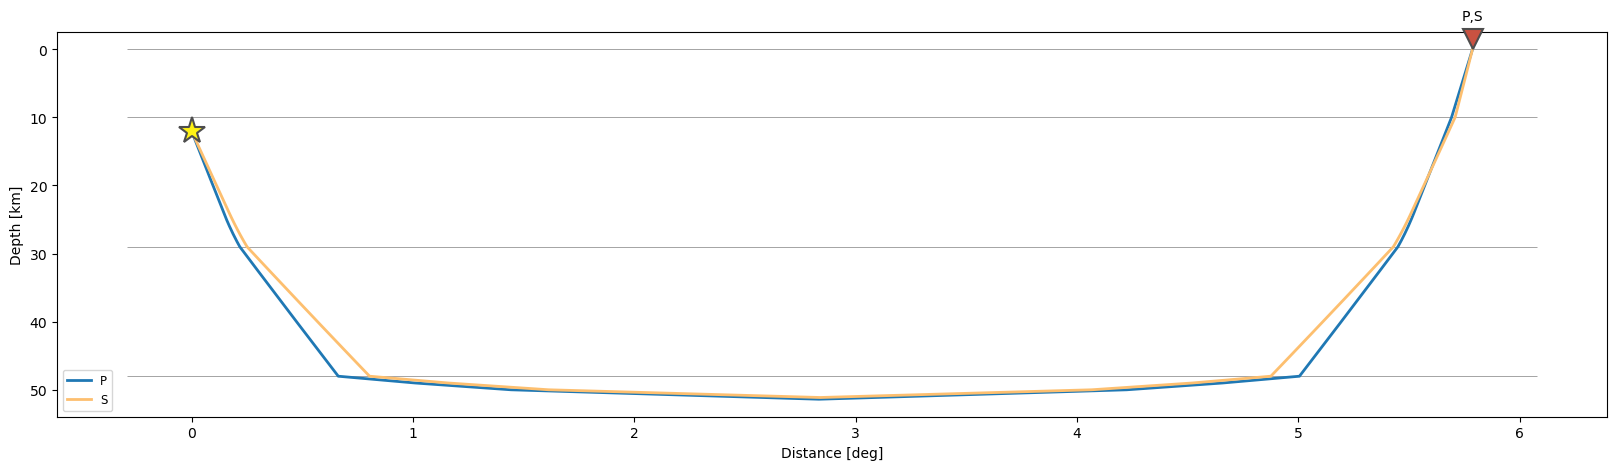

station ELYSE00001: 
  lat/lon = 0.8 / 134.0
  epicentral distance =  5.294883504810397 (degree)

  P:  P phase arrival at 52.369 seconds
  S:  S phase arrival at 90.859 seconds



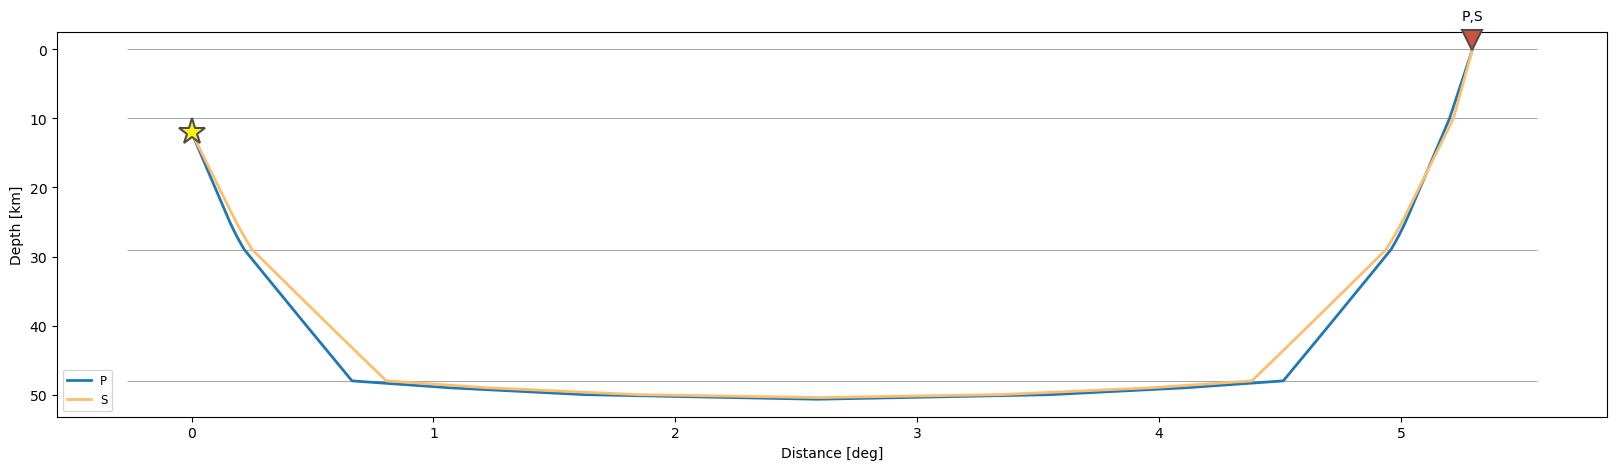

station ELYSE00002: 
  lat/lon = 1.3 / 134.0
  epicentral distance =  4.8047249405489385 (degree)

  P:  P phase arrival at 48.646 seconds
  S:  S phase arrival at 84.263 seconds



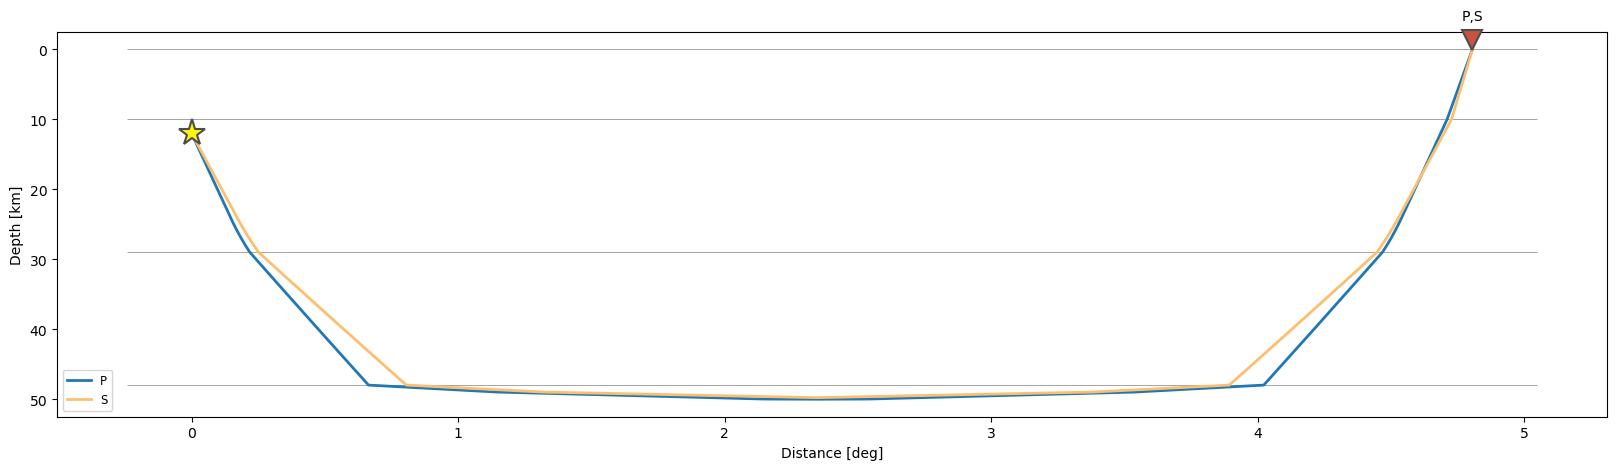

station ELYSE00003: 
  lat/lon = 1.8 / 134.0
  epicentral distance =  4.3168184844479445 (degree)

  P:  P phase arrival at 44.939 seconds
  S:  S phase arrival at 77.696 seconds



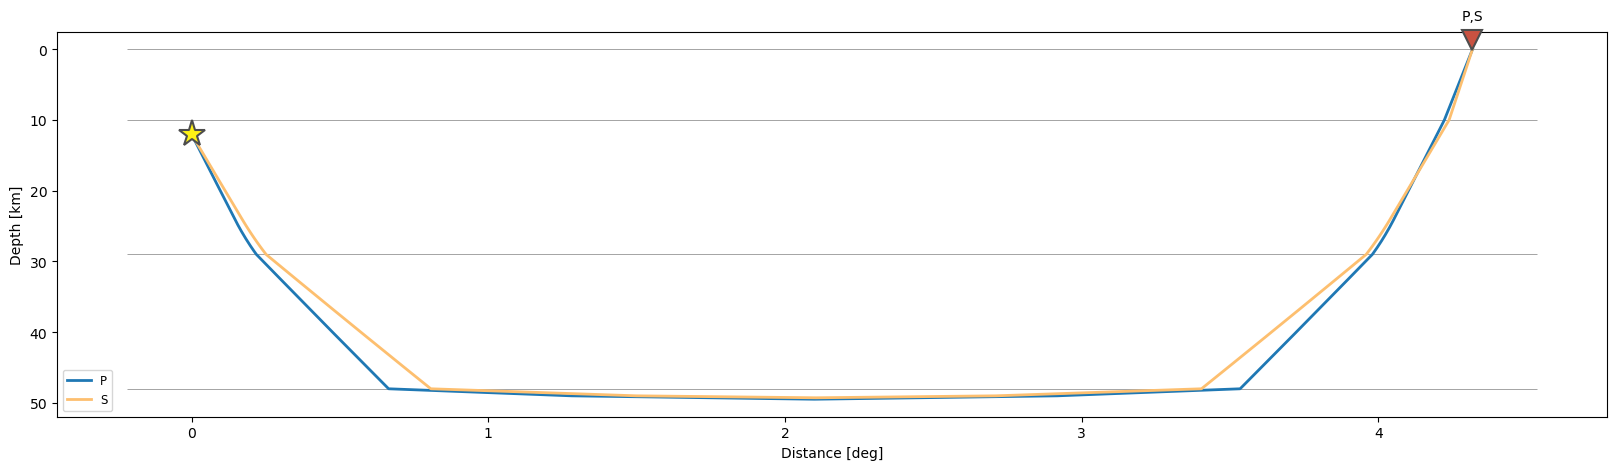

station ELYSE00004: 
  lat/lon = 2.3 / 134.0
  epicentral distance =  3.8320244749791375 (degree)

  P:  P phase arrival at 41.254 seconds
  S:  S phase arrival at 71.170 seconds



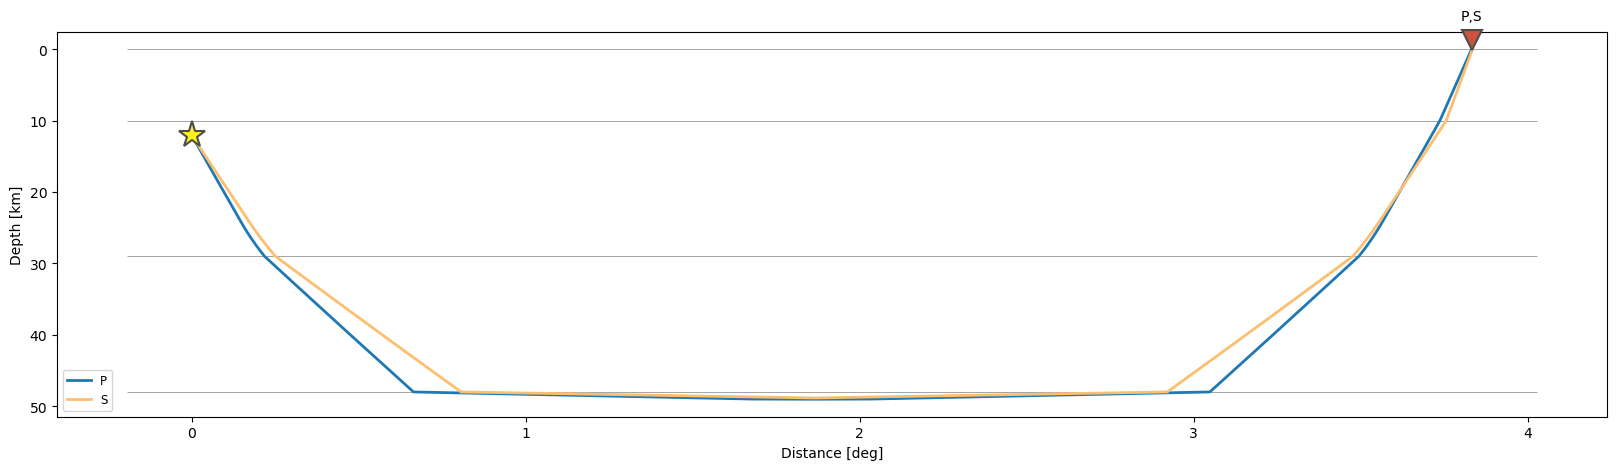

station ELYSE00005: 
  lat/lon = 2.8 / 134.0
  epicentral distance =  3.35169375481469 (degree)

  P:  P phase arrival at 37.603 seconds
  S:  S phase arrival at 64.702 seconds



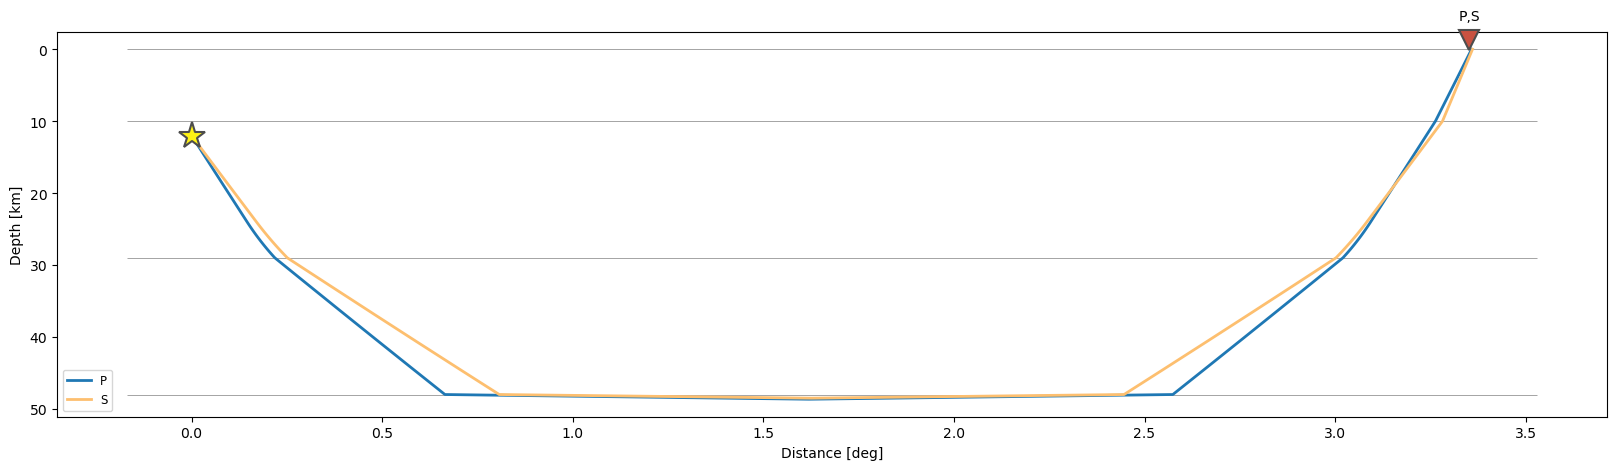

station ELYSE00006: 
  lat/lon = 3.3 / 134.0
  epicentral distance =  2.878061881978179 (degree)

  P:  P phase arrival at 34.003 seconds
  S:  S phase arrival at 57.932 seconds



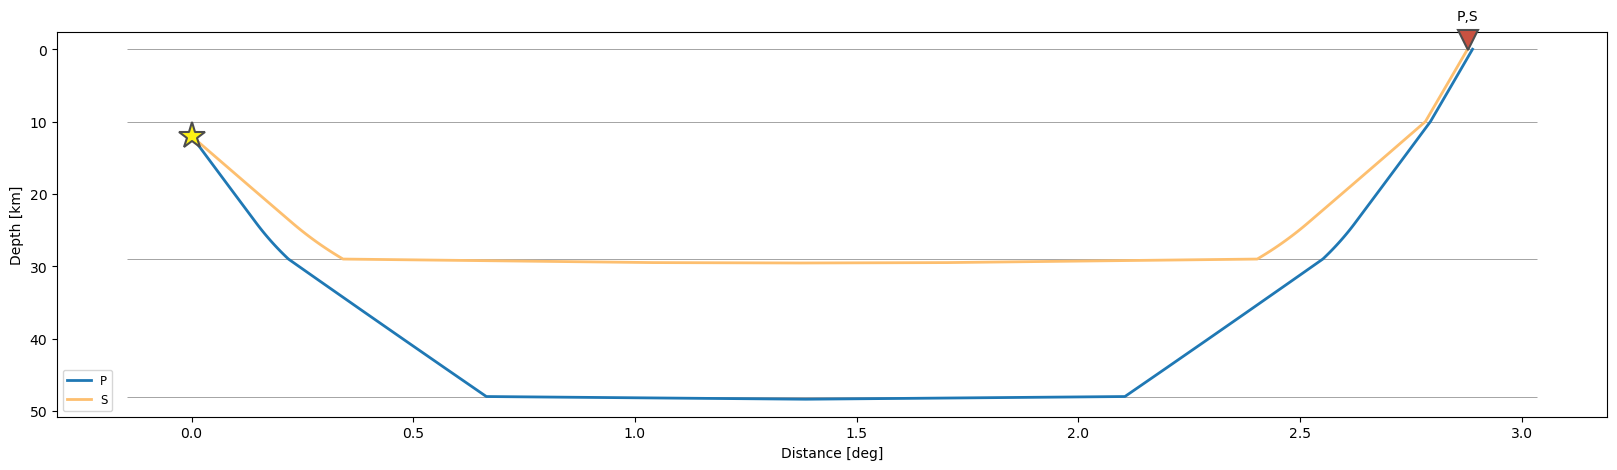

station ELYSE00007: 
  lat/lon = 3.8 / 134.0
  epicentral distance =  2.4150733128028525 (degree)

  P:  P phase arrival at 30.060 seconds
  S:  S phase arrival at 50.691 seconds



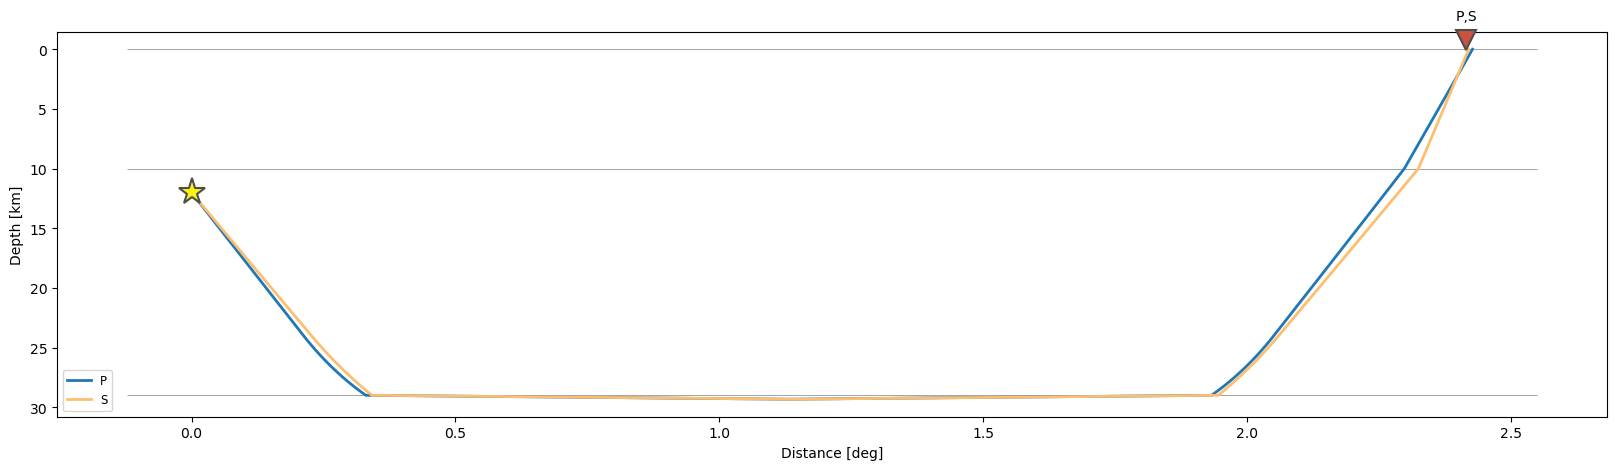

station ELYSE00008: 
  lat/lon = 4.3 / 134.0
  epicentral distance =  1.9702456116491247 (degree)

  P:  P phase arrival at 25.866 seconds
  S:  S phase arrival at 43.735 seconds



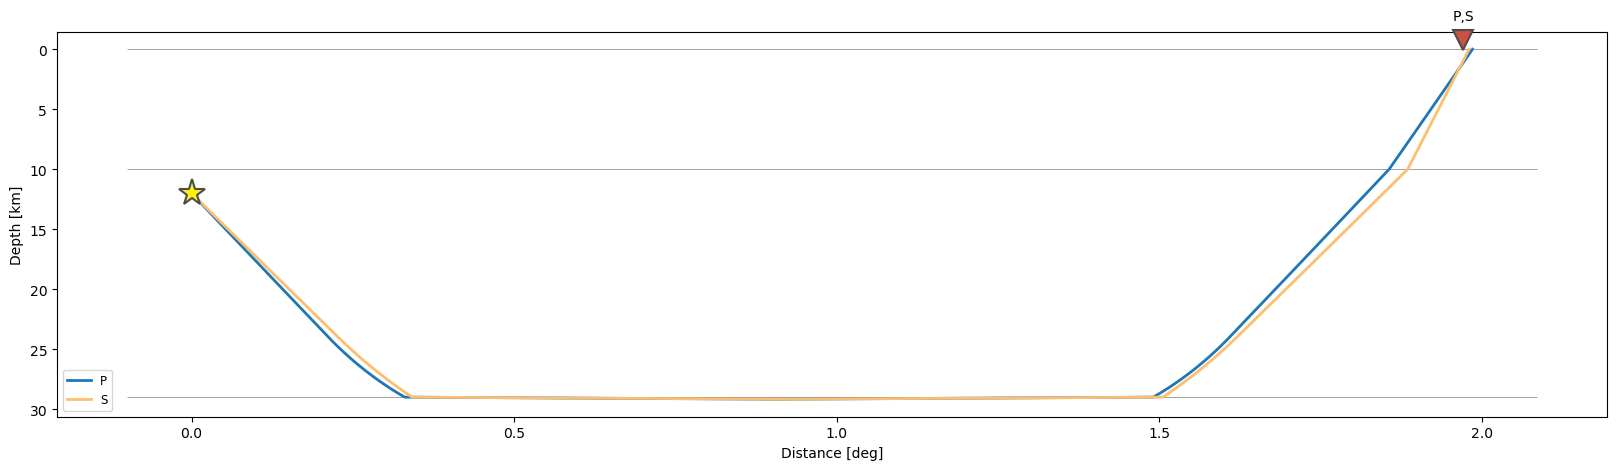

station ELYSE00009: 
  lat/lon = 4.8 / 134.0
  epicentral distance =  1.55920050040684 (degree)

  P:  p phase arrival at 21.852 seconds
  S:  S phase arrival at 37.306 seconds



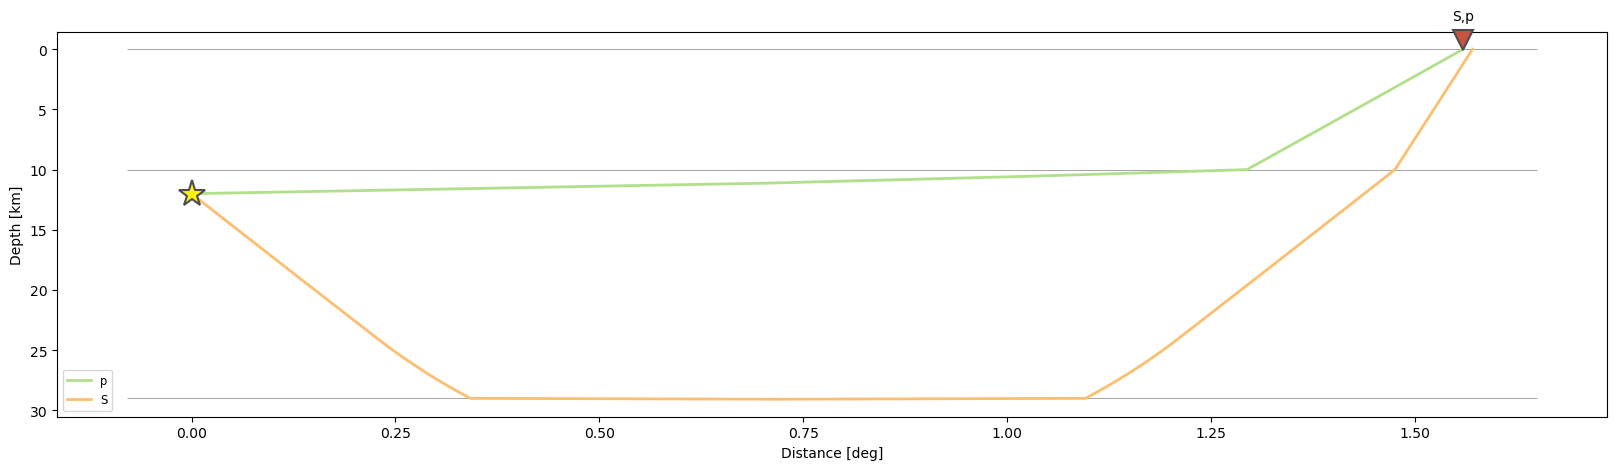

station ELYSE00010: 
  lat/lon = 5.3 / 134.0
  epicentral distance =  1.216673500094137 (degree)

  P:  p phase arrival at 17.366 seconds
  S:  S phase arrival at 31.949 seconds



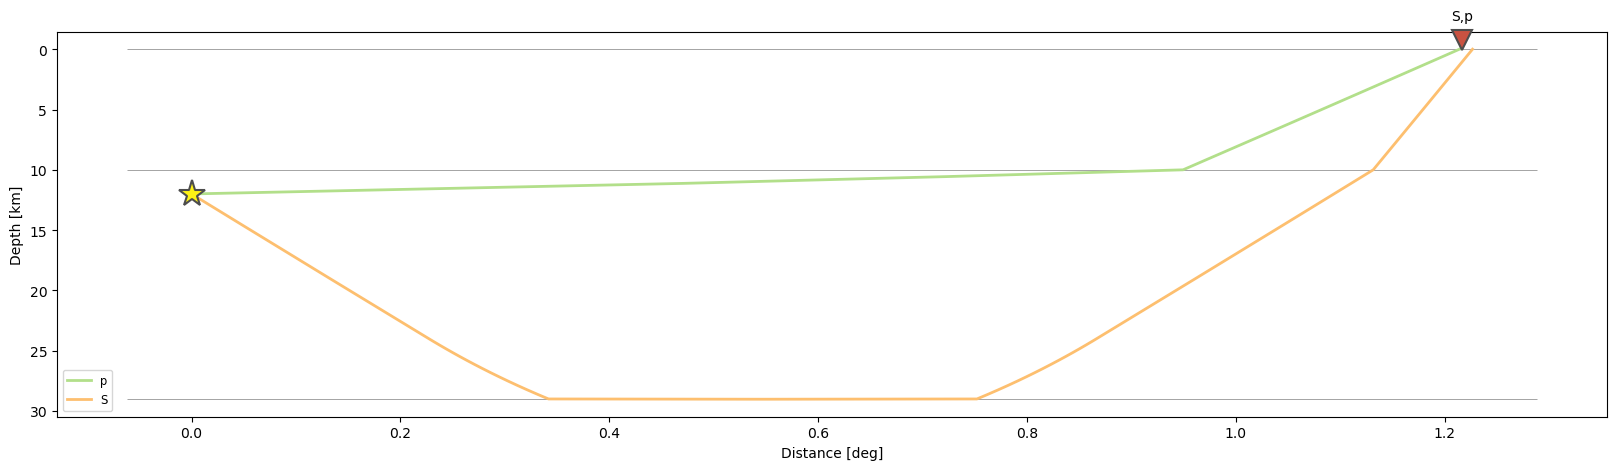

station ELYSE00011: 
  lat/lon = 5.8 / 134.0
  epicentral distance =  1.014609477645709 (degree)

  P:  p phase arrival at 14.721 seconds
  S:  S phase arrival at 28.788 seconds



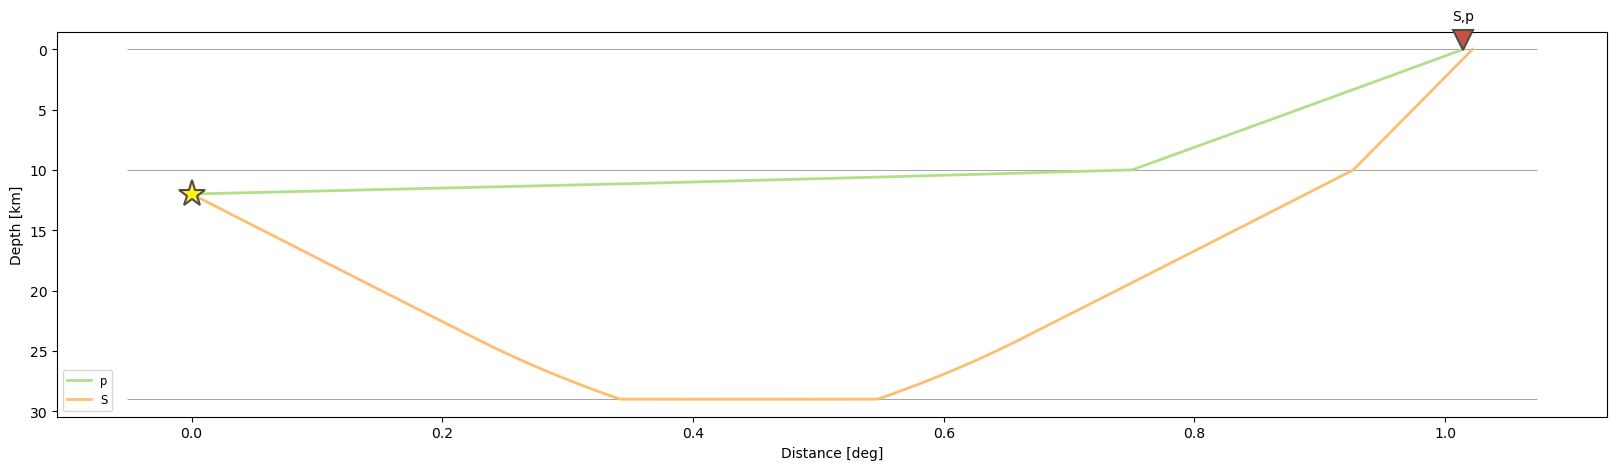

station ELYSE00012: 
  lat/lon = 6.3 / 134.0
  epicentral distance =  1.0385182531469375 (degree)

  P:  p phase arrival at 15.034 seconds
  S:  S phase arrival at 29.162 seconds



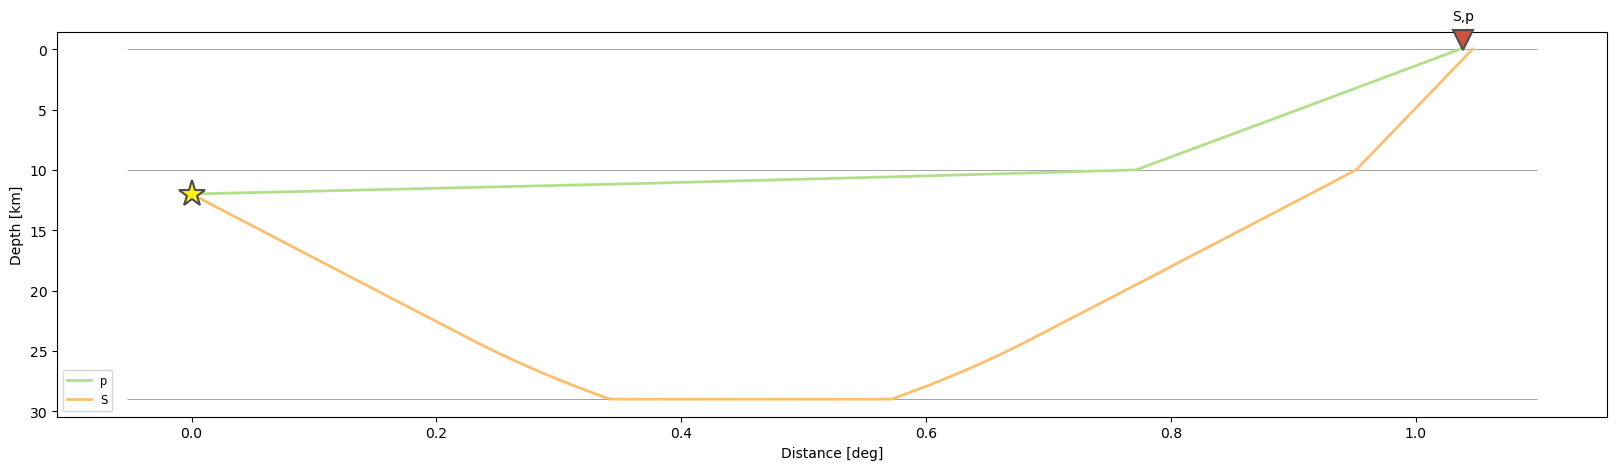

station ELYSE00013: 
  lat/lon = 6.8 / 134.0
  epicentral distance =  1.275757702506066 (degree)

  P:  p phase arrival at 18.140 seconds
  S:  S phase arrival at 32.873 seconds



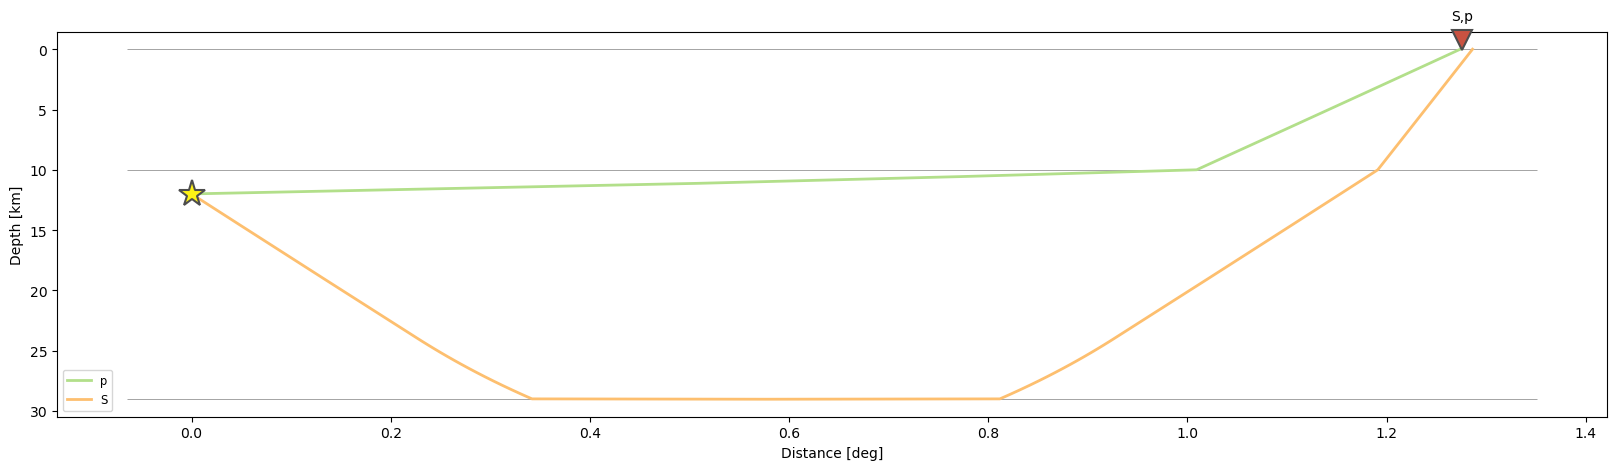

station ELYSE00014: 
  lat/lon = 7.3 / 134.0
  epicentral distance =  1.6360149904329677 (degree)

  P:  P phase arrival at 22.715 seconds
  S:  S phase arrival at 38.507 seconds



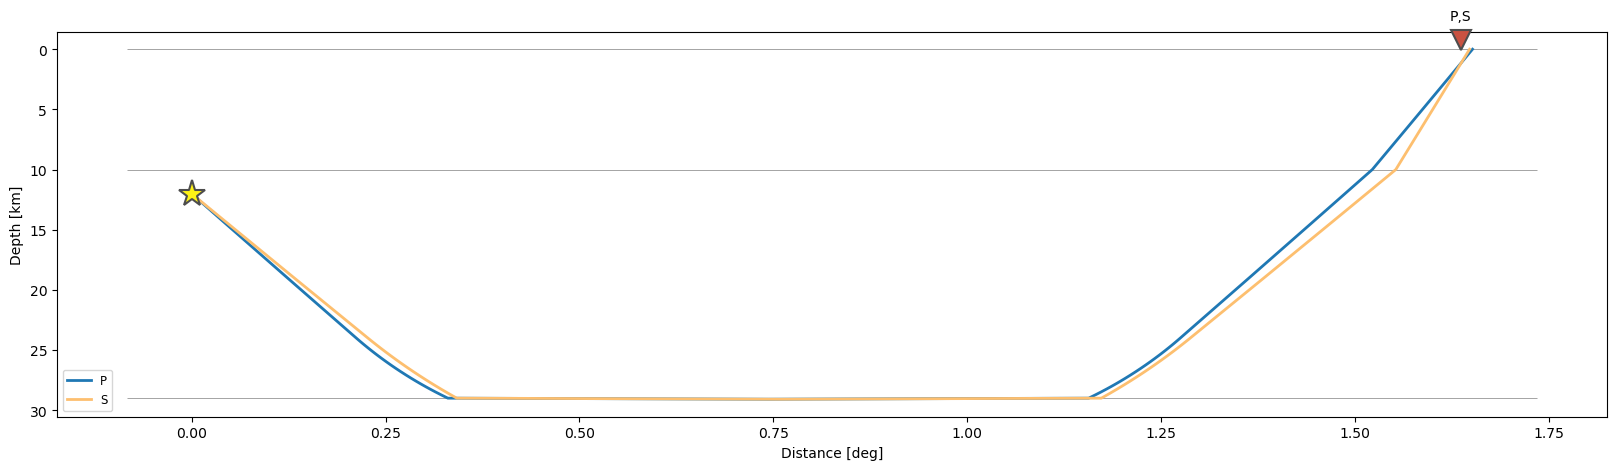

station ELYSE00015: 
  lat/lon = 7.8 / 134.0
  epicentral distance =  2.0555977612249747 (degree)

  P:  P phase arrival at 26.671 seconds
  S:  S phase arrival at 45.069 seconds



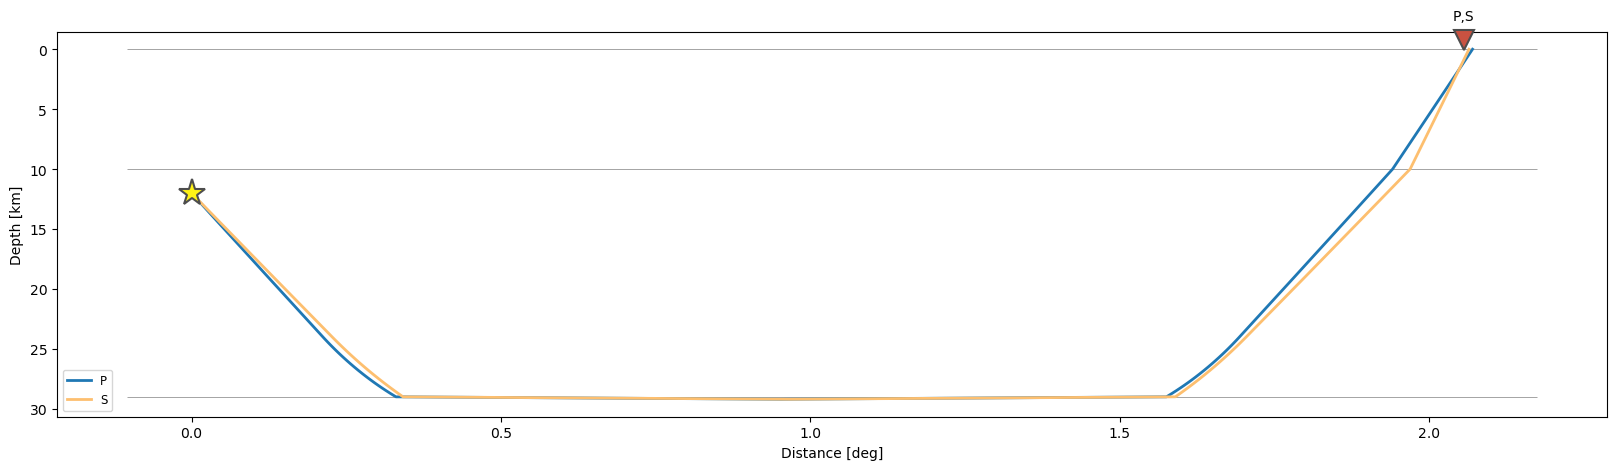

station ELYSE00016: 
  lat/lon = 8.3 / 134.0
  epicentral distance =  2.5048690638669364 (degree)

  P:  P phase arrival at 30.907 seconds
  S:  S phase arrival at 52.096 seconds



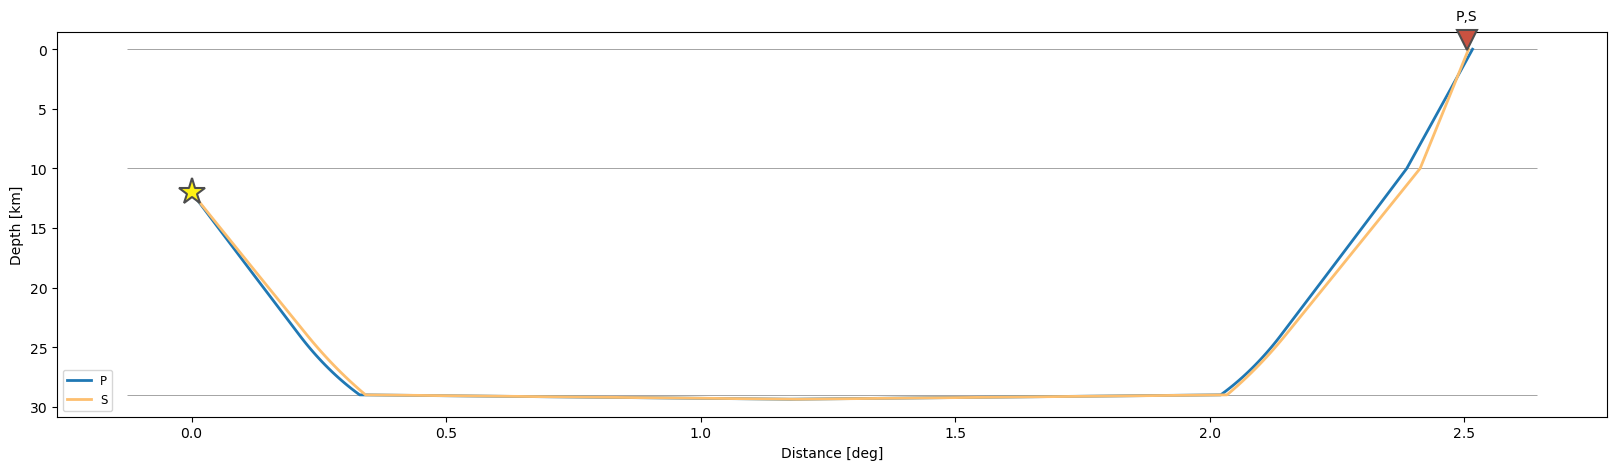

station ELYSE00017: 
  lat/lon = 8.8 / 134.0
  epicentral distance =  2.9703881311825544 (degree)

  P:  P phase arrival at 34.705 seconds
  S:  S phase arrival at 59.376 seconds



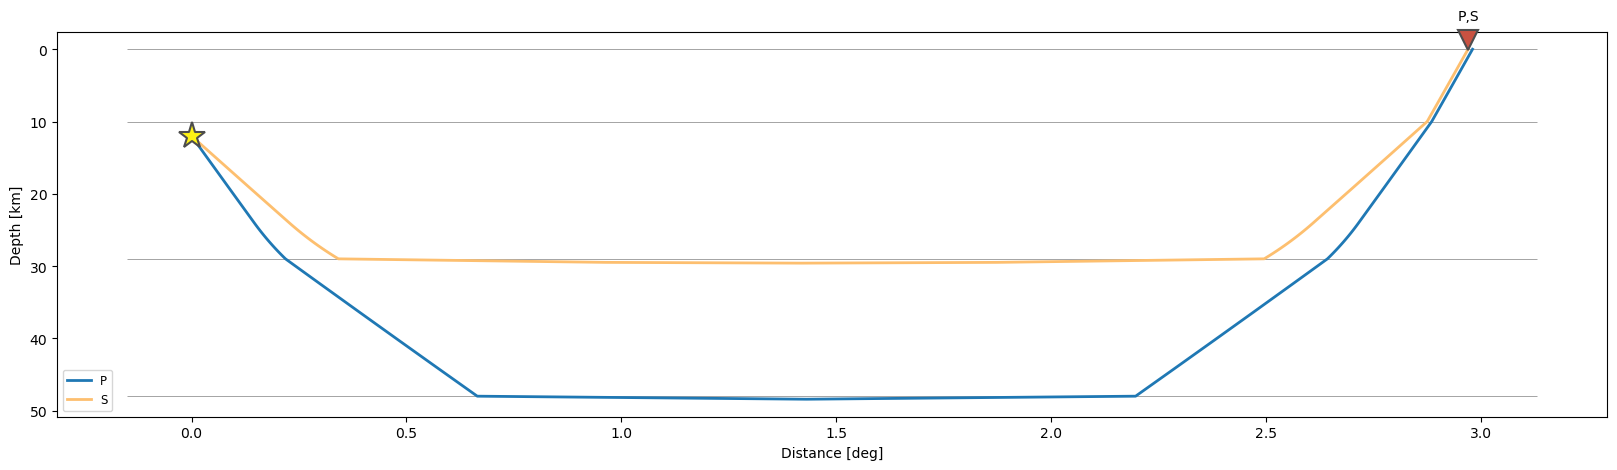

station ELYSE00018: 
  lat/lon = 9.3 / 134.0
  epicentral distance =  3.445575715116402 (degree)

  P:  P phase arrival at 38.317 seconds
  S:  S phase arrival at 65.966 seconds



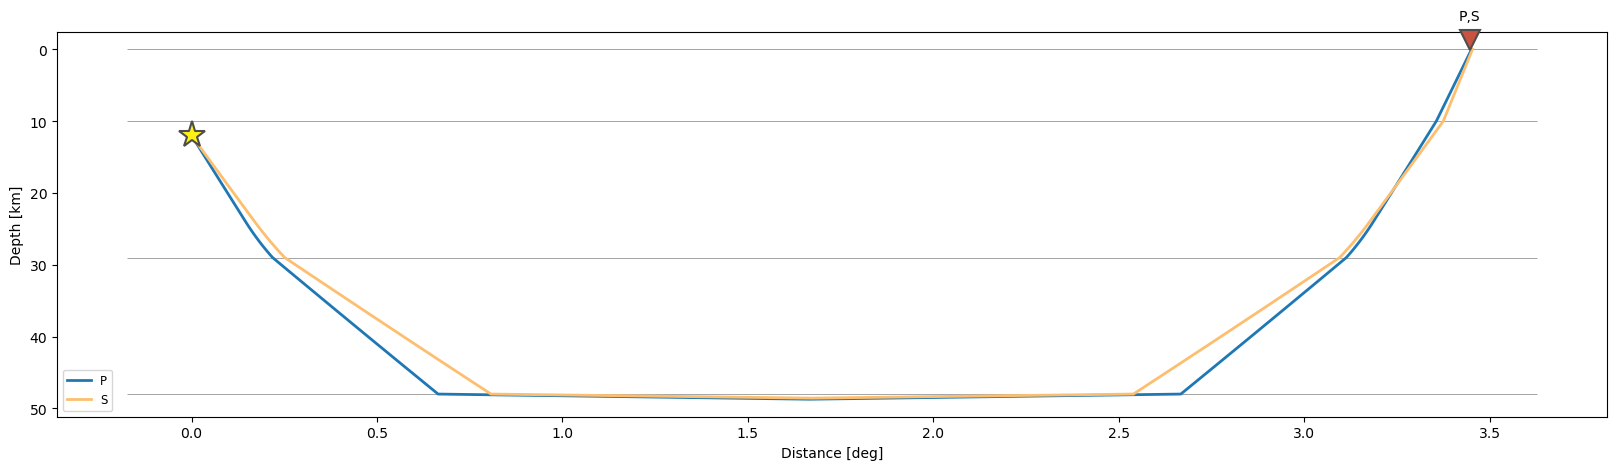

station ELYSE00019: 
  lat/lon = 9.8 / 134.0
  epicentral distance =  3.926923488511869 (degree)

  P:  P phase arrival at 41.976 seconds
  S:  S phase arrival at 72.447 seconds



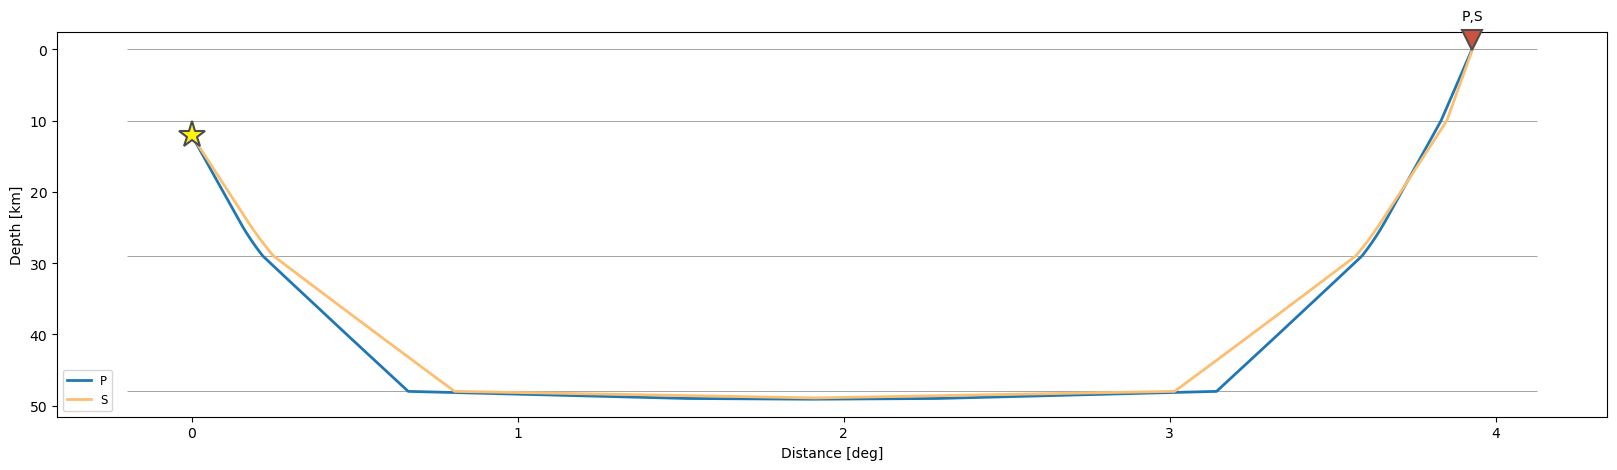

In [109]:
## epicentral distance

# event S0235b
event_lat = 6.0000
event_lon = 133.0000
event_dep_km = 12.0  # event depth in km

print("event:")
print("  lat/lon = {} / {}".format(event_lat,event_lon))
print("  depth   = ",event_dep_km,"(km)")
print("")

# InSight Lander station ELYSE.XB
#ELYSE = { 'name': 'ELYSE', 'lat': 4.502384, 'lon': 135.623444 }   

#stations = [ ELYSE ]

# epicentral distance (Haversine formula)中心距离
def get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon):
    """
    得到中心距离
    
    :param event_lat: 
    
    """
    from math import pi,sin,cos,asin,sqrt
    # converts to radians
    lat1_radians = event_lat * pi/180.0
    lon1_radians = event_lon * pi/180.0
    lat2_radians = sta_lat * pi/180.0
    lon2_radians = sta_lon * pi/180.0

    mid_lat = (lat1_radians - lat2_radians)/2.0
    mid_lon = (lon1_radians - lon2_radians)/2.0

    tmp = sqrt( pow(sin(mid_lat),2) + cos(lat1_radians)*cos(lat2_radians)*pow(sin(mid_lon),2) )

    distance_radians = 2.0 * asin(tmp)
    dist = distance_radians * 180.0/pi
    
    return dist

# show epicentral distances and main arrival times
for station in stations:    
    sta_lat = station['lat']
    sta_lon = station['lon']
    dist = get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon)
    
    print("station {}: ".format(station['name']))
    print("  lat/lon = {} / {}".format(sta_lat,sta_lon))
    print("  epicentral distance = ",dist,"(degree)")
    print("")

    # P, S arrival times (can have multiple P, S arrivals)
    arrivals_P = model.get_travel_times(source_depth_in_km=event_dep_km,
                                        distance_in_degree=dist, 
                                        phase_list=["ttall"])  # using 'ttall' in case Pn would be first, instead of P

    arrivals_S = model.get_travel_times(source_depth_in_km=event_dep_km,
                                        distance_in_degree=dist, 
                                        phase_list=["S"])
    
    # traveltimes for first arrivals    
    print("  P: ",arrivals_P[0])
    print("  S: ",arrivals_S[0])
    print("")
    
    # plot rays for first arrivals
    arrivals_P = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["ttall"])
    arrivals_S = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["S"])
    arrivals_PcP = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["PcS"])
    
    arrivals = obspy.taup.tau.Arrivals([],model=model.model)
    arrivals.append(arrivals_P[0])
    arrivals.append(arrivals_S[0])
    # arrivals.append(arrivals_PcP[0])
    #plt.title(station['name'])
    ax = arrivals.plot_rays(plot_type="cartesian",label_arrivals=True,legend=True)
    
    

In [102]:
## arrival times
print("all arrival times:")
      
# takes InSight Lander station
station = stations[1]
sta_lat = station['lat']
sta_lon = station['lon']

# station epicentral distance in degree
dist = get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon)

print("\n  source depth: {} km, distance: {}°".format(event_dep_km,dist))

#phases = ["P","PP","PPP","PPS","p","pPcP","PKIKP","PKJKP","S","SP","SS","SSS","pP","sP","ScS","SKKS"]
phases = ["ttall"]

arrivals = model.get_travel_times(source_depth_in_km=event_dep_km,
                                  distance_in_degree=dist, 
                                  phase_list=phases)

print("\n  all possible arrivals: ",arrivals) 

all arrival times:

  source depth: 12.0 km, distance: 5.294883504810397°

  all possible arrivals:  53 arrivals
	P phase arrival at 52.369 seconds
	Pn phase arrival at 52.380 seconds
	P phase arrival at 57.205 seconds
	P phase arrival at 57.534 seconds
	pP phase arrival at 57.686 seconds
	sP phase arrival at 60.944 seconds
	pP phase arrival at 62.009 seconds
	pP phase arrival at 62.379 seconds
	sP phase arrival at 65.411 seconds
	sP phase arrival at 65.768 seconds
	PP phase arrival at 66.903 seconds
	PP phase arrival at 67.156 seconds
	PP phase arrival at 68.949 seconds
	P phase arrival at 70.778 seconds
	P phase arrival at 70.920 seconds
	pP phase arrival at 73.906 seconds
	PP phase arrival at 74.772 seconds
	sP phase arrival at 77.703 seconds
	sP phase arrival at 77.907 seconds
	sP phase arrival at 87.603 seconds
	sP phase arrival at 87.677 seconds
	S phase arrival at 90.859 seconds
	Sn phase arrival at 90.876 seconds
	SP phase arrival at 93.494 seconds
	S phase arrival at 95.716 se

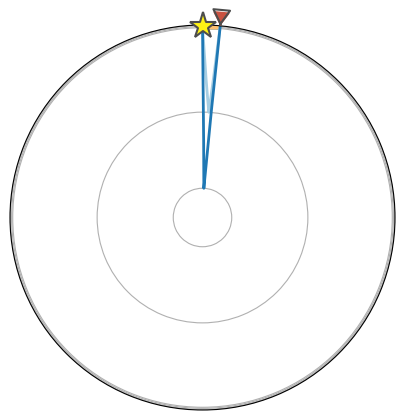

In [103]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km, 
                               distance_in_degree=dist, 
                               phase_list=['S', 'P', 'PcS', 'pPKiKP'])
ax = arrivals.plot_rays()

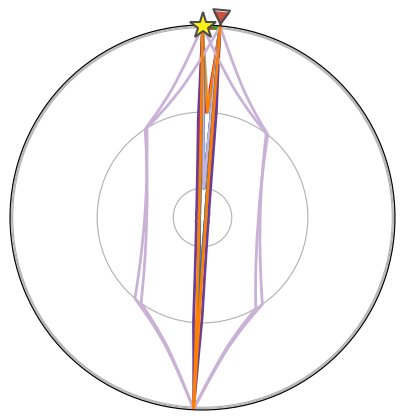

In [104]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km, 
                               distance_in_degree=dist, 
                               phase_list=phases)
ax = arrivals.plot_rays()

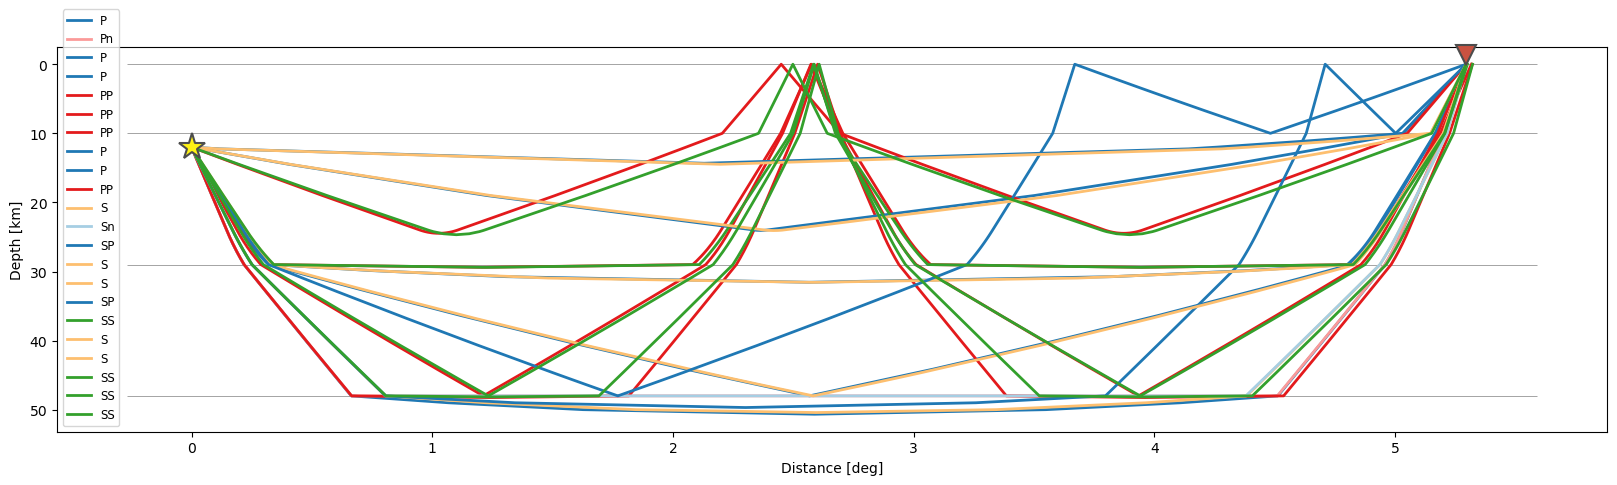

In [105]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km,
                               distance_in_degree=dist,
                               phase_list=["P","Pn","PP","S","Sn","SP","PS","SS"])  # 
ax = arrivals.plot_rays(plot_type="cartesian", legend=True)

## inSight Data 

In [3]:
pathinSightDATA = os.path.join("/Users/zhangzhiyu/MyProjects/InSight-seismic-data-downloader/DATA/")
## broadband
pathBroadband = os.path.join(pathinSightDATA, 'BROADBAND')
## low_frequency
pathLowFrequency = os.path.join(pathinSightDATA, 'LOW_FREQUENCY')

os.chdir(os.path.join(pathLowFrequency, 'A'))
os.system('exa -l')
os.chdir(os.path.join(pathLowFrequency, 'A', 'S0173a'))
print('\n')
os.system('exa -l')

drwxr-xr-x@ - zhangzhiyu 24 11 16:38 S0173a
drwxr-xr-x@ - zhangzhiyu 24 11 16:38 S0809a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S0820a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S0976a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S1022a
drwxr-xr-x@ - zhangzhiyu 24 11 16:37 S1048d


.rw-r--r--@ 594k zhangzhiyu 24 11 16:38 S0173a.mseed
.rw-r--r--@ 3.9M zhangzhiyu 24 11 16:38 S0173a_ACC.mseed
.rw-r--r--@ 3.9M zhangzhiyu 24 11 16:38 S0173a_DISP.mseed
.rw-r--r--@ 3.9M zhangzhiyu 24 11 16:38 S0173a_VEL.mseed


0

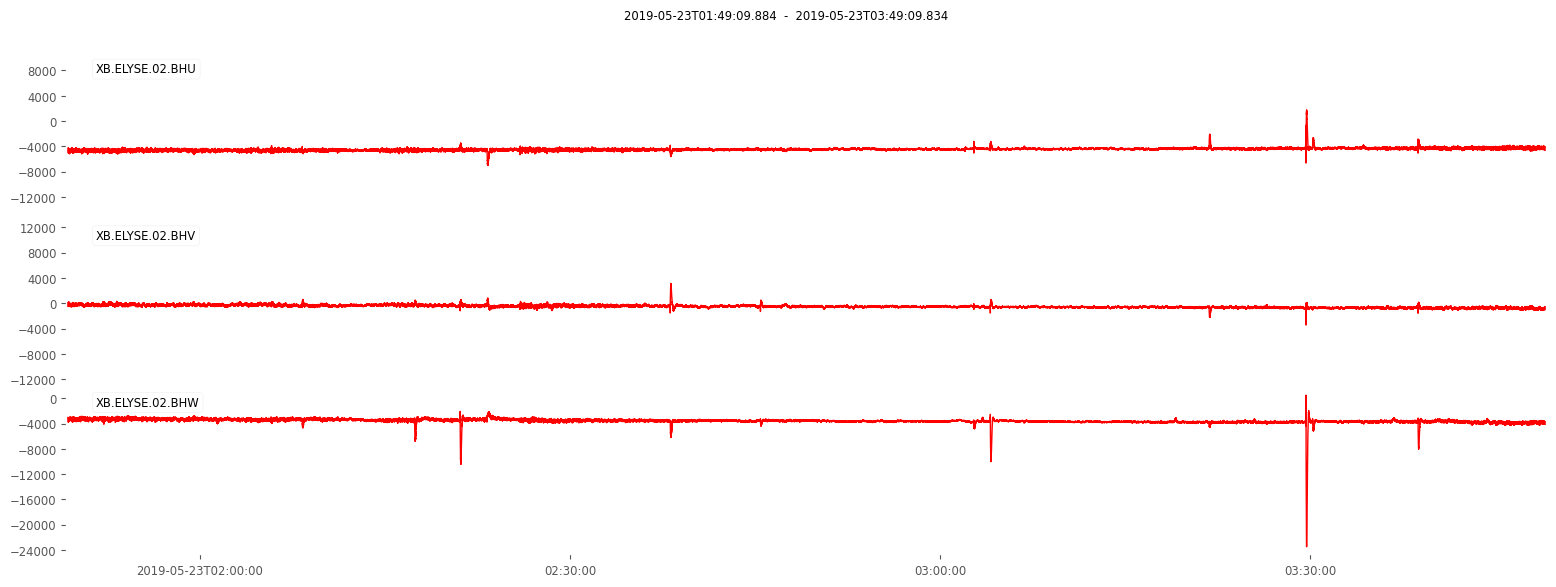

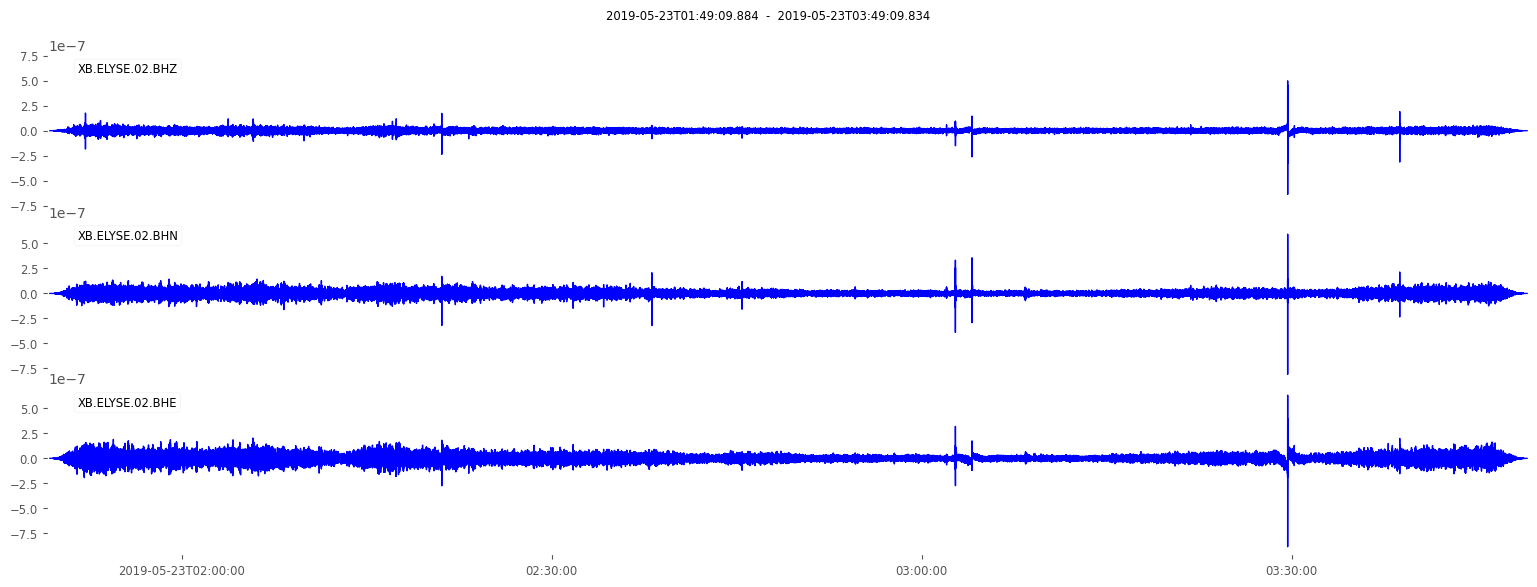

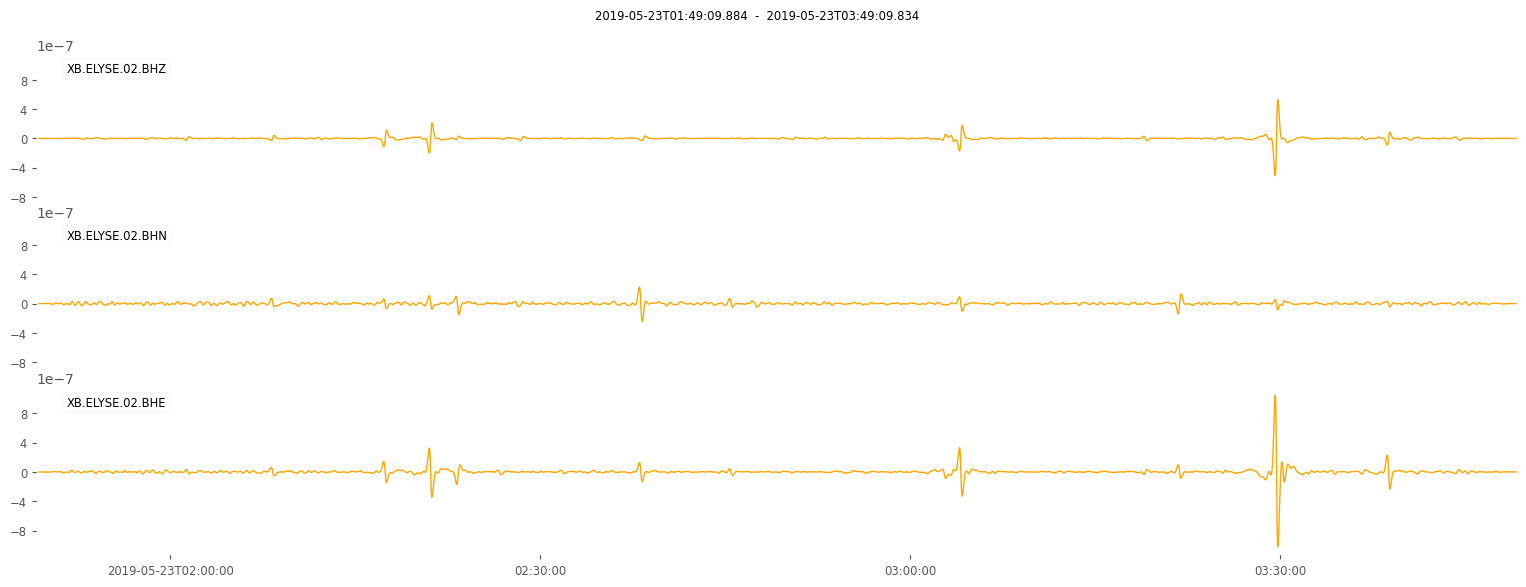

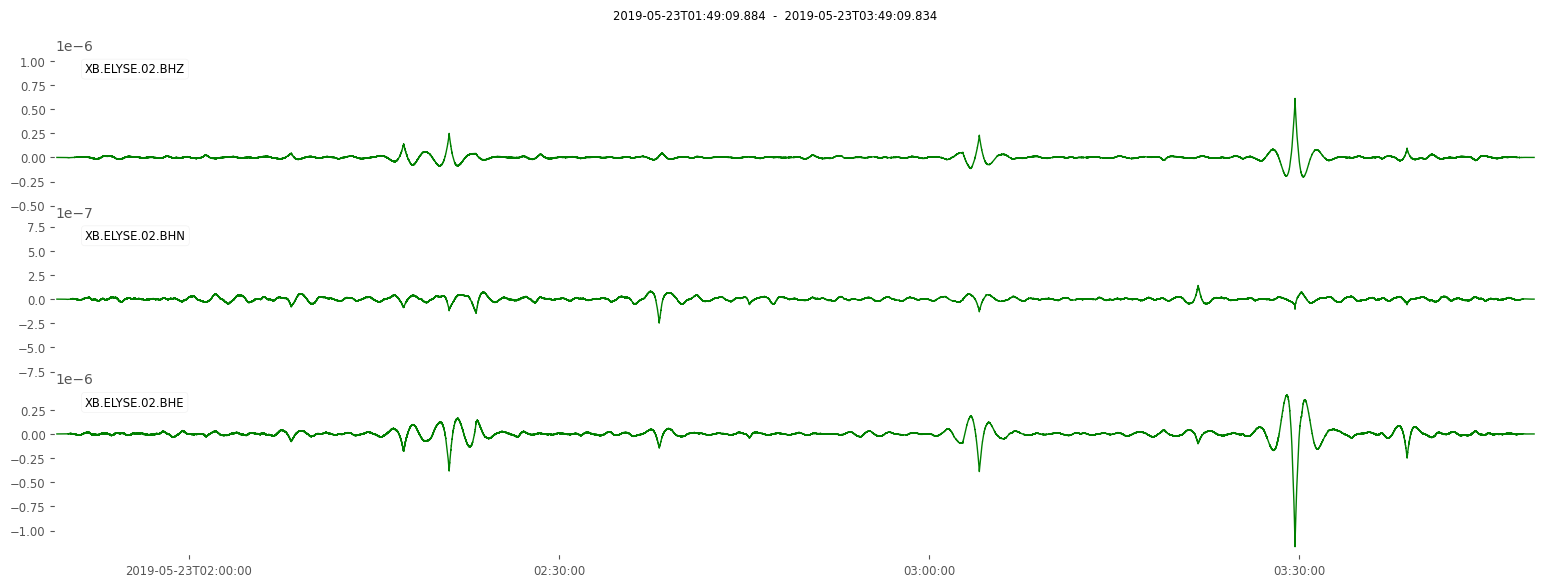

In [13]:
dataS0173a = obspy.read('S0173a.mseed')
dataS0173aACC = obspy.read('S0173a_ACC.mseed')
dataS0173aDISP = obspy.read('S0173a_DISP.mseed')
dataS0173aVel = obspy.read('S0173a_VEL.mseed')

fig = plt.figure()
fig.subplots(141)
dataS0173a.plot(color='red',
                size=(1600, 600))
fig.subplots(142)
dataS0173aACC.plot(color='blue',
                size=(1600, 600))
fig.subplots(143)
dataS0173aDISP.plot(color='orange',
                size=(1600, 600))
fig.subplots(144)
dataS0173aVel.plot(color='green',
                size=(1600, 600))
plt.show()

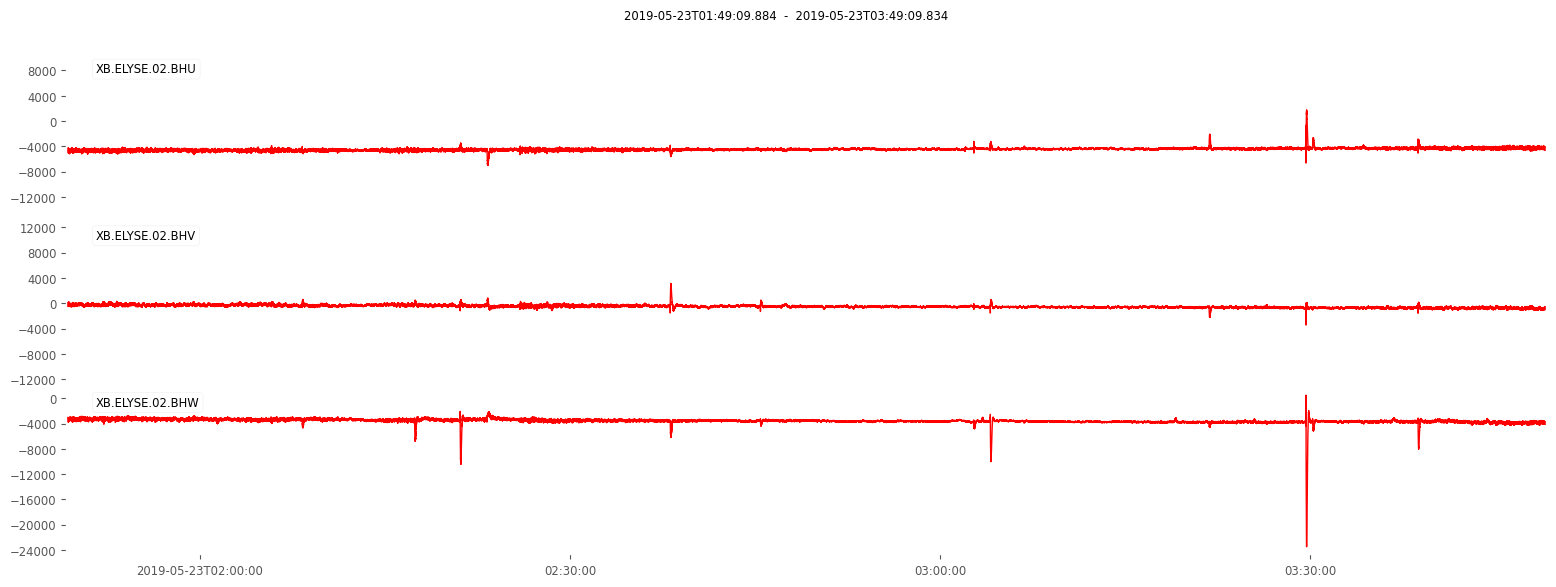

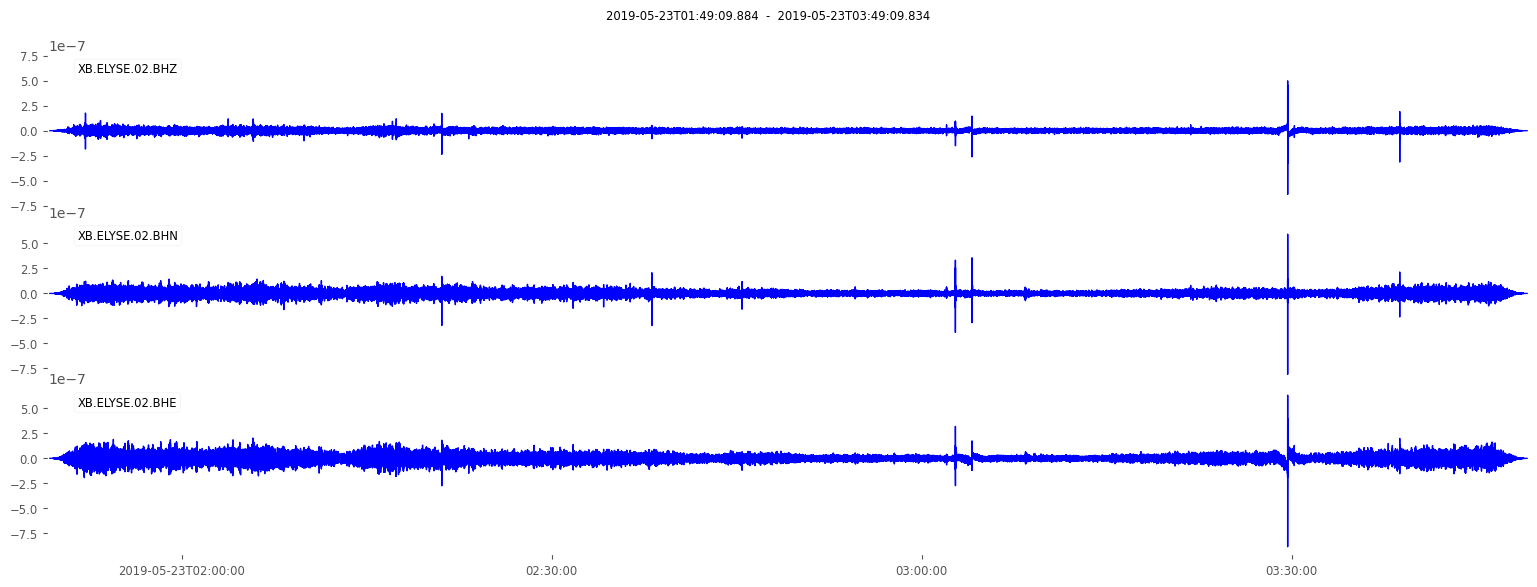

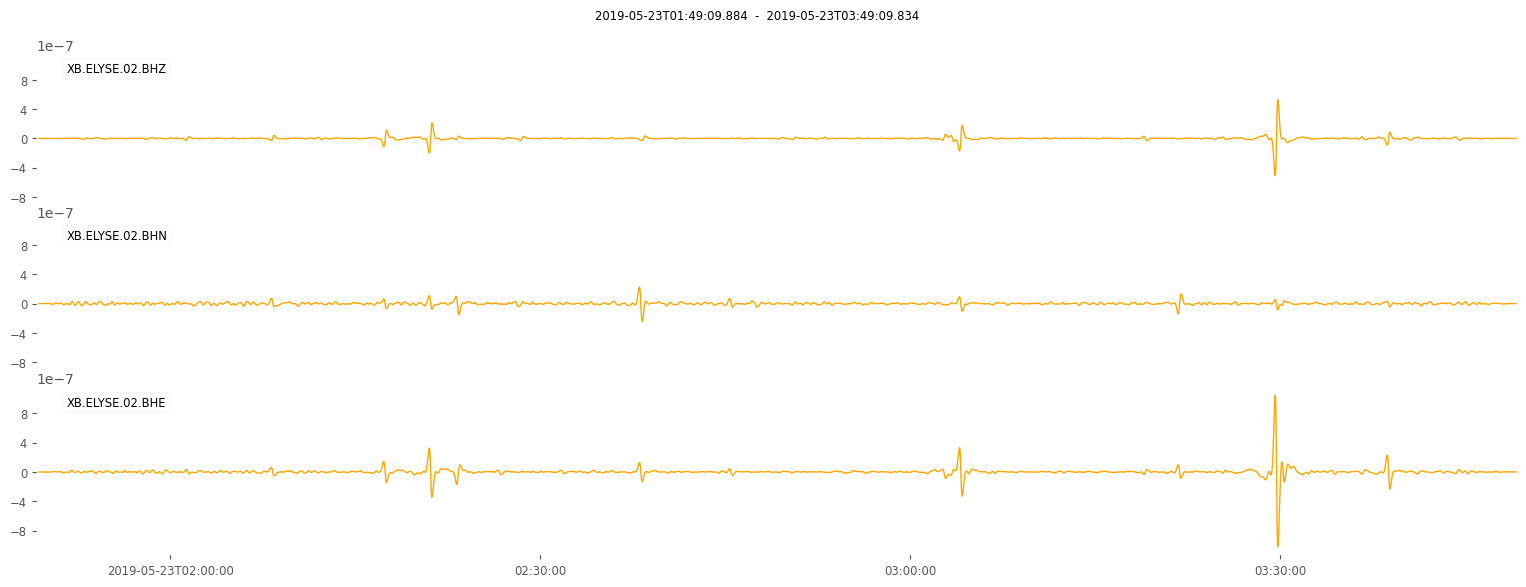

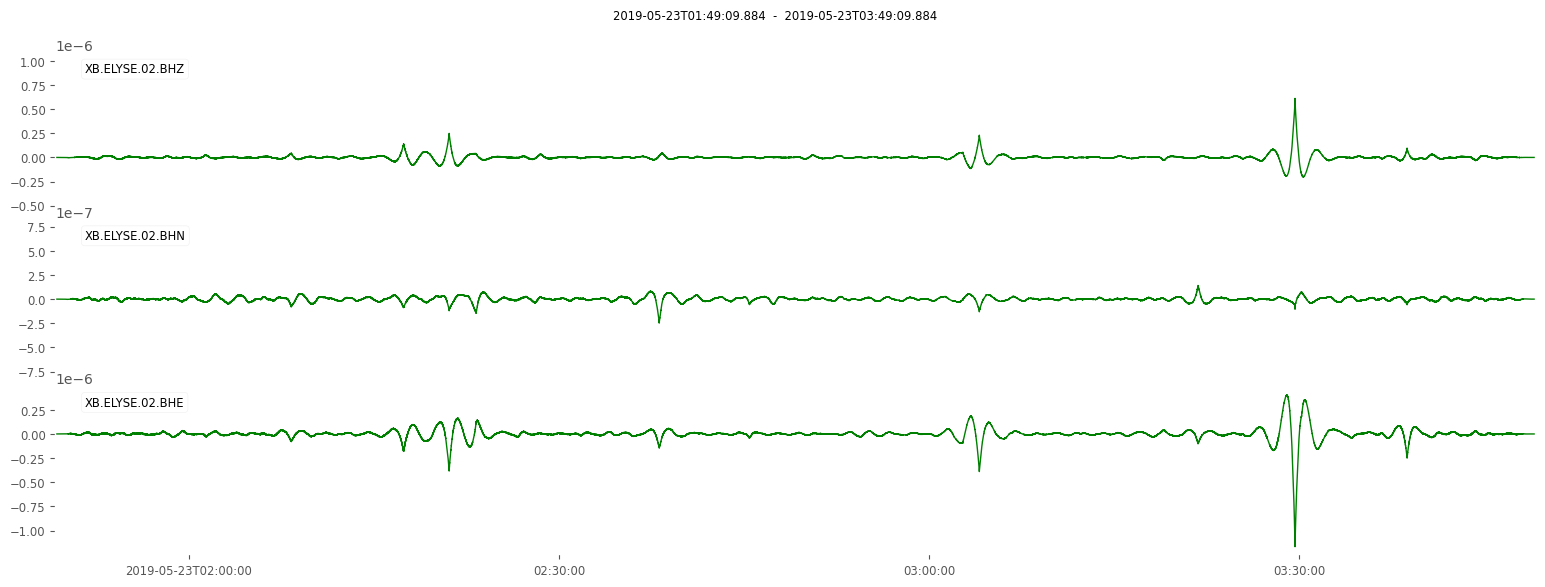

In [15]:
fig = plt.figure()
fig.subplots(141)
dataS0173a.plot(color='red',
                size=(1600, 600))
fig.subplots(142)
dataS0173aACC.plot(color='blue',
                size=(1600, 600))
fig.subplots(143)
dataS0173aDISP.plot(color='orange',
                size=(1600, 600))
fig.subplots(144)
dataS0173aVel.plot(color='green',
                size=(1600, 600),
                endtime=dataS0173aVel[0].stats.starttime + 2*60*60)
plt.show()